# Exercise 10: Hierarchical clustering of the grain data

In the video, you learnt that the SciPy `linkage()` function performs hierarchical clustering on an array of samples.  Use the `linkage()` function to obtain a hierarchical clustering of the grain samples, and use `dendrogram()` to visualize the result.  A sample of the grain measurements is provided in the array `samples`, while the variety of each grain sample is given by the list `varieties`.


**Step 1:** Import:

 + `linkage` and `dendrogram` from `scipy.cluster.hierarchy`.
 + `matplotlib.pyplot` as `plt`.
 + `pandas`
 + `load_iris` and `train_test_split`

In [15]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import datasets
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram,linkage
from scipy.cluster.hierarchy import fcluster,cophenet
from scipy.spatial.distance import pdist

import sklearn.metrics as sm

# Display plots inline and change plot resolution to retina
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# Set Seaborn aesthetic parameters to defaults
sns.set()



**Step 2:** Load the dataset _(done for you)_.

In [5]:

iris_data =datasets.load_iris()


In [6]:
#Create pd DF the same way you did the first day
#Create the class and target columns and remove de cm from the columns names

def create_df():
    
    df = pd.DataFrame(iris_data.data,columns=['sepal length', 'sepal width', 'petal length', 'petal width'])
    df['target']=iris_data.target
    df['class']=iris_data.target_names[iris_data.target]
    return df



In [8]:
df_iris = create_df()
assert df_iris['sepal length'].shape == (150,)
assert df_iris['sepal width'].shape == (150,)
assert df_iris['petal length'].shape == (150,)
assert df_iris['petal width'].shape == (150,)
assert df_iris['target'].shape == (150,)
assert df_iris['class'].shape == (150,)

In [9]:
df_iris

,sepal length,sepal width,petal length,petal width,target,class
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [10]:

#From our data we will only get variable columns as np.array

def data_to_numpy():
    x = df_iris[['sepal length','sepal width','petal length','petal width']].to_numpy()
    return x


In [11]:
x=data_to_numpy()
assert x.shape == (150,4)

**Step 3:** Perform hierarchical clustering on `samples` using the `linkage()` function with the `method='complete'` keyword argument. Assign the result to `mergings`.

In [77]:
mergings = linkage(x,"complete")

In [78]:
assert mergings.shape == (149,4)

**Step 4:** Plot a dendrogram using the `dendrogram()` function on `mergings`, specifying the keyword arguments `labels=varieties`, `leaf_rotation=90`, and `leaf_font_size=6`.  Remember to call `plt.show()` afterwards, to display your plot.

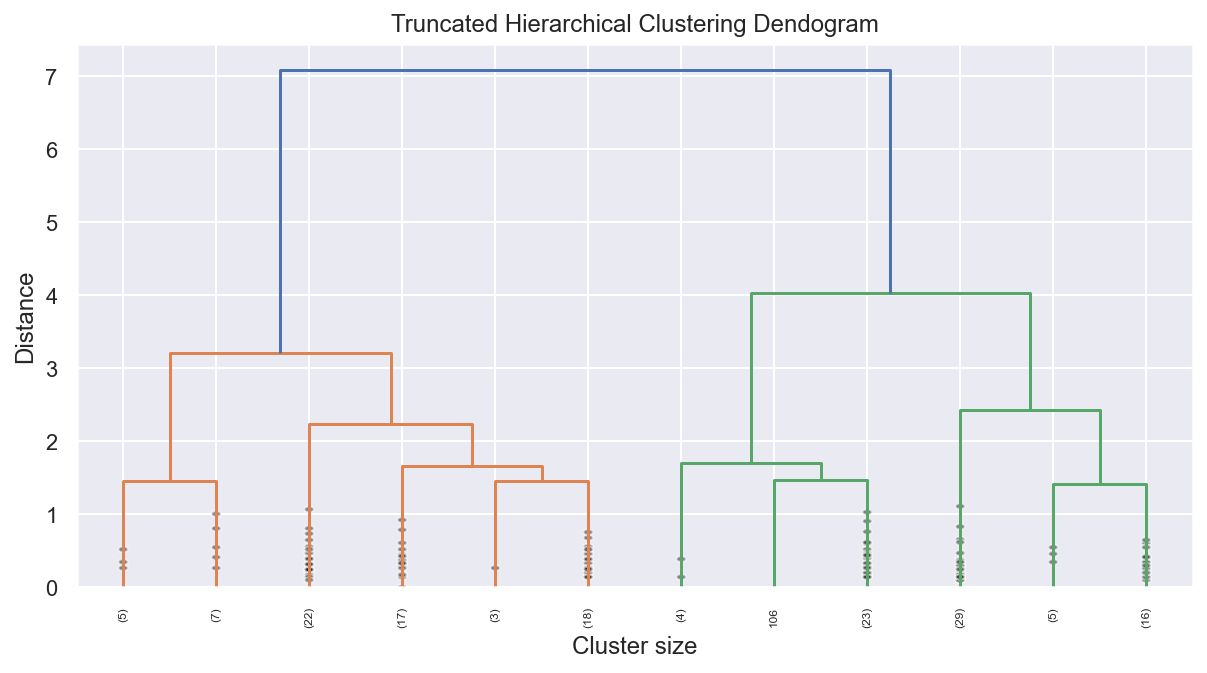

In [79]:
plt.figure(figsize=(10,5))
dn = dendrogram(mergings,truncate_mode='lastp',p=12,leaf_rotation=90.,leaf_font_size=6.,show_contracted=True)
plt.title('Truncated Hierarchical Clustering Dendogram')
plt.ylabel('Distance')
plt.xlabel("Cluster size")

plt.show()


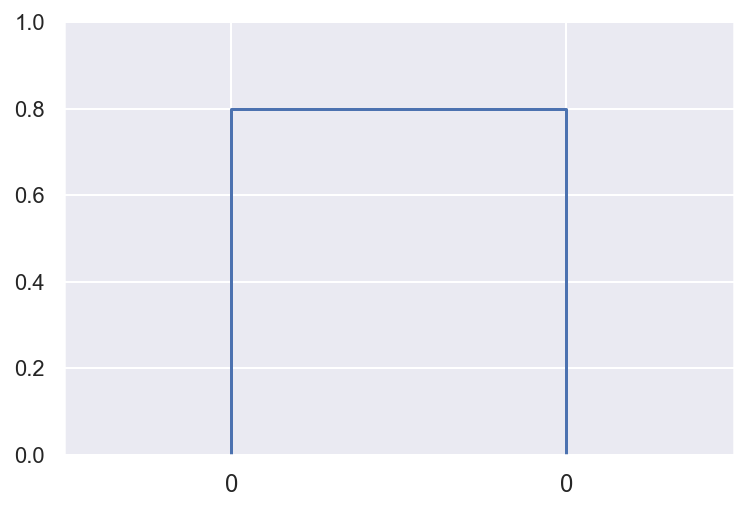

In [80]:
assert type(dn) == type(dendrogram(np.random.rand(15, 4)))

## K-MEANS

for this next part we will use the K-Means algorithm in order to cluster your data

**Step 1:** 
+ import `KMeans` from `sklearn.cluster`
+ loading our new datasets

In [81]:
from sklearn.cluster import KMeans

df = pd.read_csv('./02. Partitional Algorithms/datasets/ch1ex1.csv')
points = df.values

new_df = pd.read_csv('./02. Partitional Algorithms/datasets/ch1ex2.csv')
new_points = new_df.values


In [82]:
points

array([[ 0.06544649, -0.76866376],
       [-1.52901547, -0.42953079],
       [ 1.70993371,  0.69885253],
       [ 1.16779145,  1.01262638],
       [-1.80110088, -0.31861296],
       [-1.63567888, -0.02859535],
       [ 1.21990375,  0.74643463],
       [-0.26175155, -0.62492939],
       [-1.61925804, -0.47983949],
       [-1.84329582, -0.16694431],
       [ 1.35999602,  0.94995827],
       [ 0.42291856, -0.7349534 ],
       [-1.68576139,  0.10686728],
       [ 0.90629995,  1.09105162],
       [-1.56478322, -0.84675394],
       [-0.0257849 , -1.18672539],
       [ 0.83027324,  1.14504612],
       [ 1.22450432,  1.35066759],
       [-0.15394596, -0.71704301],
       [ 0.86358809,  1.06824613],
       [-1.43386366, -0.2381297 ],
       [ 0.03844769, -0.74635022],
       [-1.58567922,  0.08499354],
       [ 0.6359888 , -0.58477698],
       [ 0.24417242, -0.53172465],
       [-2.19680359,  0.49473677],
       [ 1.0323503 , -0.55688   ],
       [-0.28858067, -0.39972528],
       [ 0.20597008,

**Step 2:** Using `KMeans()`, create a `KMeans` instance called `model` to find `3` clusters. To specify the number of clusters, use the `n_clusters` keyword argument


In [83]:
model = KMeans(n_clusters=3)
model

KMeans(n_clusters=3)

In [84]:
assert type(model)== type(KMeans())

**Step 4:** Use the `.fit()` method of `model` to fit the model to the array of points `points`.

In [85]:
point=model.fit(points)
point

KMeans(n_clusters=3)

**Step 5:** Use the `.predict()` method of `model` to predict the cluster labels of `points`, assigning the result to `labels`.

In [88]:
labels = model.fit_predict(points)


In [89]:
assert labels[labels.argmax()] == 2
assert labels.shape == (300,)

In [90]:
df1=df
df1['cluster']=labels
df1

,0,1,cluster
0,0.065446,-0.768664,2
1,-1.529015,-0.429531,0
2,1.709934,0.698853,1
3,1.167791,1.012626,1
4,-1.801101,-0.318613,0
...,...,...,...
295,0.356950,-1.150644,2
296,0.024822,-0.635948,2
297,-1.490756,-0.248251,0
298,-1.408588,0.256354,0


In [91]:
# Make a function that returns 3 numpy arrays each one with the points associated for each class
#If the label is 0 they go into data_0
#If the label is 1 they go into data_1
#If the label is 2 they go into data_2
#def separate_labels(labels, points):
data_0 = df1[df1.cluster==0]
data_1 = df1[df1.cluster==1]
data_2 = df1[df1.cluster==2]
    #return data_0,data_1,data_2


In [92]:
assert abs(data_0.shape[0] - 94) <= 20
assert abs(data_1.shape[0] - 95) <= 20
assert abs(data_2.shape[0] - 111) <= 20

Text(0, 0.5, '1')

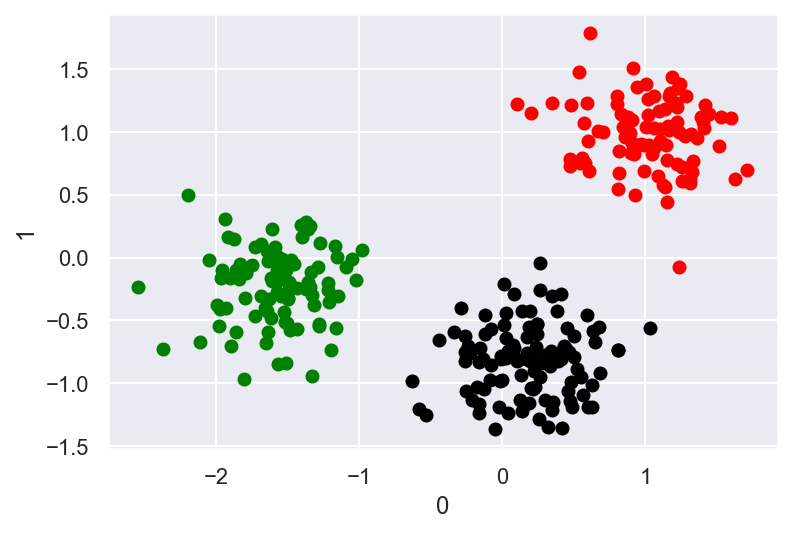

In [93]:
# plotting the data 
plt.scatter(data_0['0'],data_0['1'],color="green")
plt.scatter(data_1['0'],data_1['1'],color="red")
plt.scatter(data_2['0'],data_2['1'],color="black")

plt.xlabel('0')
plt.ylabel('1')

**Step 7:** Use the `.predict()` method of `model` to predict the cluster labels of `new_points`, assigning the result to `new_labels`.  Notice that KMeans can assign previously unseen points to the clusters it has already found!

In [94]:
new_labels = model.fit_predict(new_points)


In [95]:
assert new_labels[new_labels.argmax()] == 2
assert new_labels.shape == (100,)

In [96]:
df2=new_df
df2['cluster']=new_labels
df2

,0,1,cluster
0,0.896765,1.143127,1
1,0.973851,0.929172,1
2,-1.839089,0.348506,0
3,-1.045098,0.072468,0
4,0.820274,-0.710225,2
...,...,...,...
95,0.562296,0.727745,1
96,1.139011,0.657293,1
97,-1.846300,-0.643803,0
98,0.266199,-0.178750,2


In [97]:
#separate the data by labels like we did before

new_0 = df2[df2.cluster==0]
new_1 = df2[df2.cluster==1]
new_2 = df2[df2.cluster==2]


In [98]:
assert abs(new_0.shape[0] - 34) <= 5
assert abs(new_1.shape[0] - 34) <= 5
assert abs(new_2.shape[0] - 34) <= 5

Text(0, 0.5, '1')

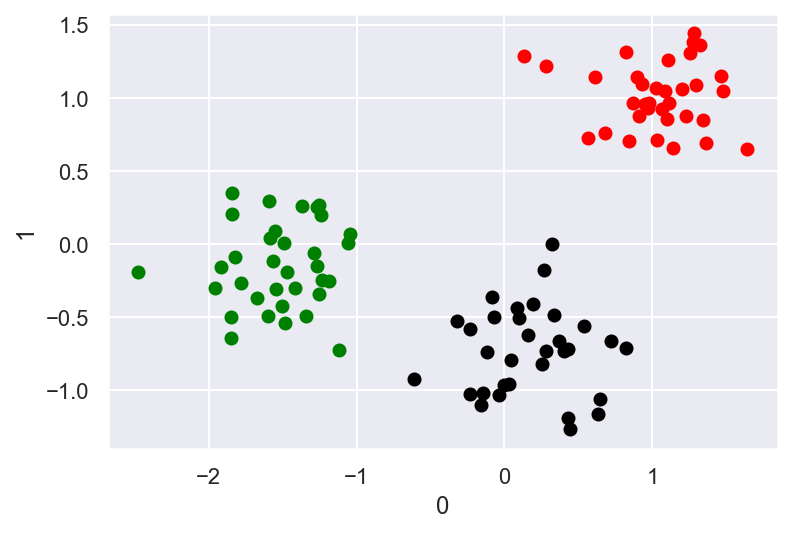

In [99]:
#plot the new labels

plt.scatter(new_0['0'],new_0['1'],color="green")
plt.scatter(new_1['0'],new_1['1'],color="red")
plt.scatter(new_2['0'],new_2['1'],color="black")

plt.xlabel('0')
plt.ylabel('1')
### BEGIN SOLUTION

### END SOLUTION

Text(0, 0.5, '1')

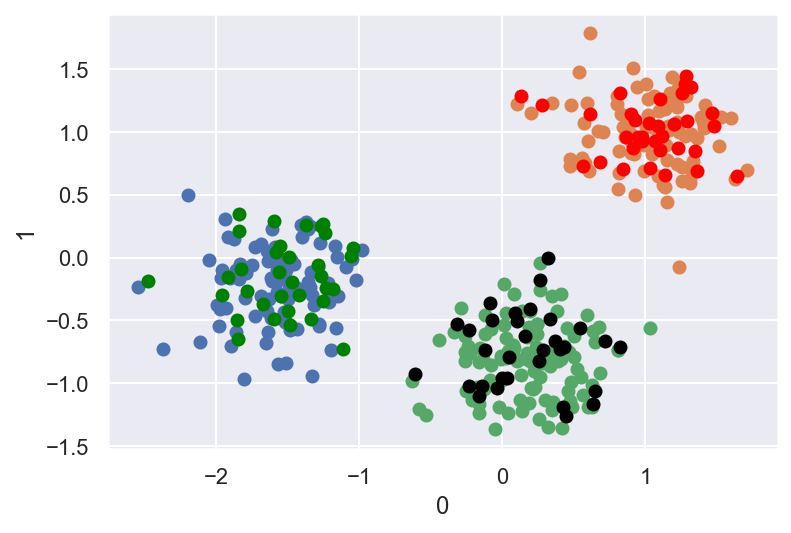

In [100]:
#plot all the points together
plt.scatter(data_0['0'],data_0['1'],)
plt.scatter(data_1['0'],data_1['1'],)
plt.scatter(data_2['0'],data_2['1'],)
plt.scatter(new_0['0'],new_0['1'],color="green")
plt.scatter(new_1['0'],new_1['1'],color="red")
plt.scatter(new_2['0'],new_2['1'],color="black")

plt.xlabel('0')
plt.ylabel('1')
